In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('ggplot')
import seaborn as sns


In [3]:
data=pd.read_excel("Book4.xlsx")

In [4]:
data.head()

,region,sex,age,size,target
0,north,male,twenty,thirtyeight,111
1,south,female,twenty one,thirtysix,222
2,west,male,thirty,forty,333
3,east,female,thirty one,thirtyone,444
4,northeast,female,forty,fortysix,555


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  19 non-null     object
 1   sex     19 non-null     object
 2   age     19 non-null     object
 3   size    19 non-null     object
 4   target  19 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 888.0+ bytes


In [6]:
data.shape

(19, 5)

In [7]:
backup=data.copy()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   region  19 non-null     object
 1   sex     19 non-null     object
 2   age     19 non-null     object
 3   size    19 non-null     object
 4   target  19 non-null     int64 
dtypes: int64(1), object(4)
memory usage: 888.0+ bytes


In [9]:
data.describe(include='all')

,region,sex,age,size,target
count,19,19,19,19,19.000000
unique,8,2,19,18,NaN
top,north,male,twenty,twentytwo,NaN
freq,3,10,1,2,NaN
mean,NaN,NaN,NaN,NaN,2894.210526
std,NaN,NaN,NaN,NaN,3301.012750
min,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,499.500000
50%,NaN,NaN,NaN,NaN,999.000000
75%,NaN,NaN,NaN,NaN,4999.500000


checking relationship of age with target

In [10]:
data['age'].unique()

array(['twenty', ' twenty one', 'thirty', 'thirty one', 'forty',
       'fortyone', 'fifty', 'fiftyone', 'sixty', 'sixtyone', 'thirtyfour',
       'thirtyfive', 'fortyfour', 'fortyfive', 'fiftyfive', 'fiftysix',
       'sixtyfive', 'fifteen', 'eleven'], dtype=object)

C:\Users\HP\AppData\Local\Temp\ipykernel_15904\806423635.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


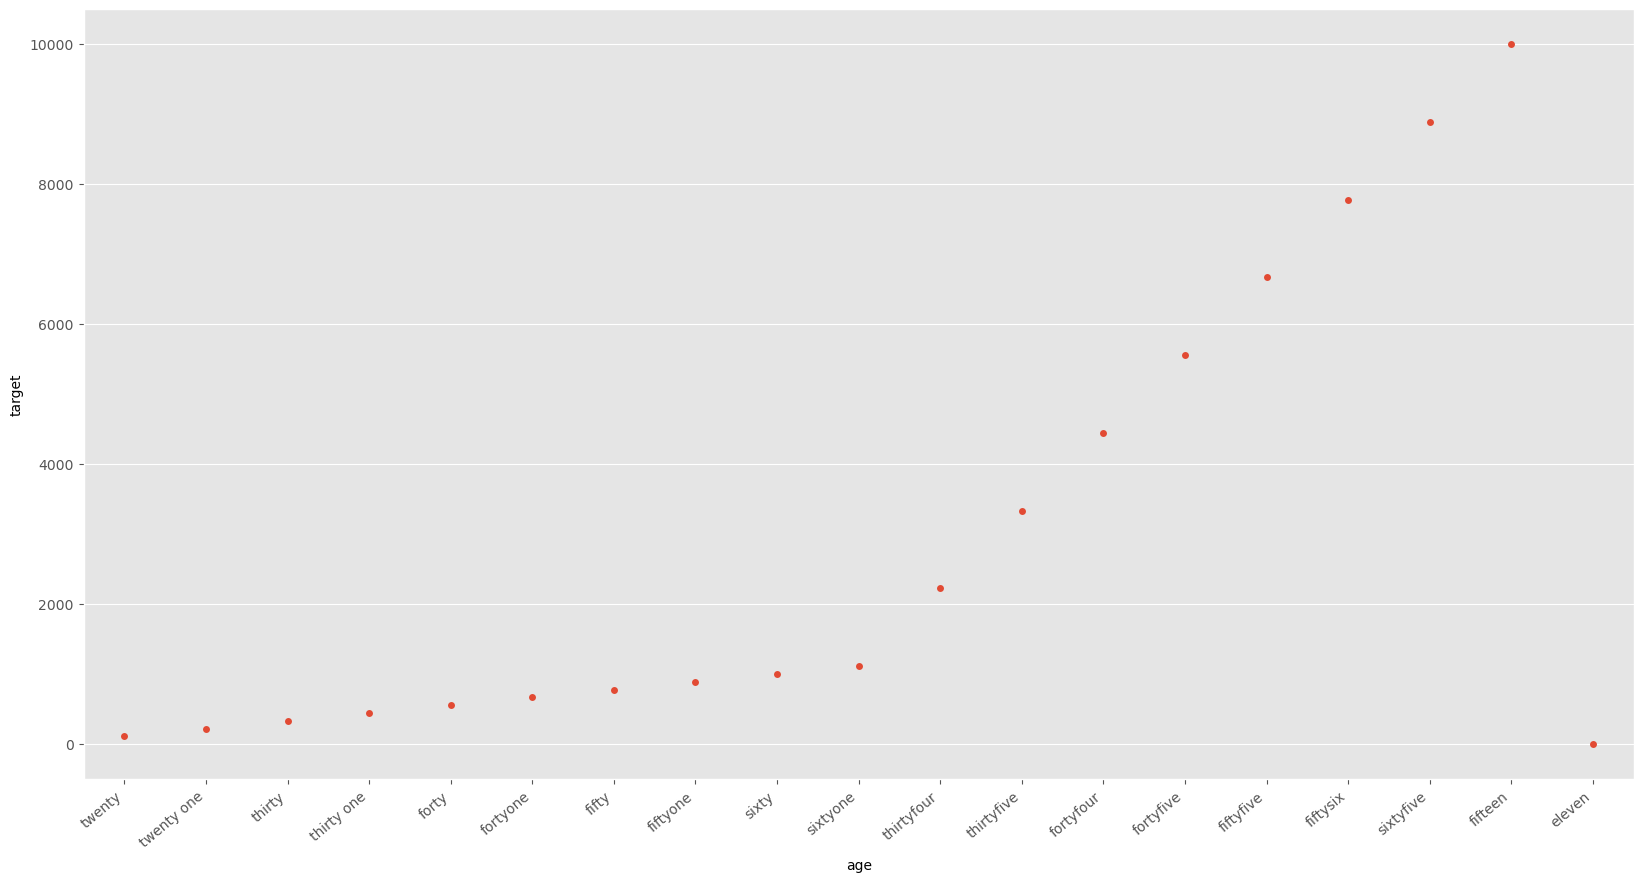

In [11]:
# plt.subplots(figsize=(20,10))
# ax=sns.boxplot(x='age',y='target',data=data)
# ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
# plt.show()
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='age',y='target',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15904\1936135080.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


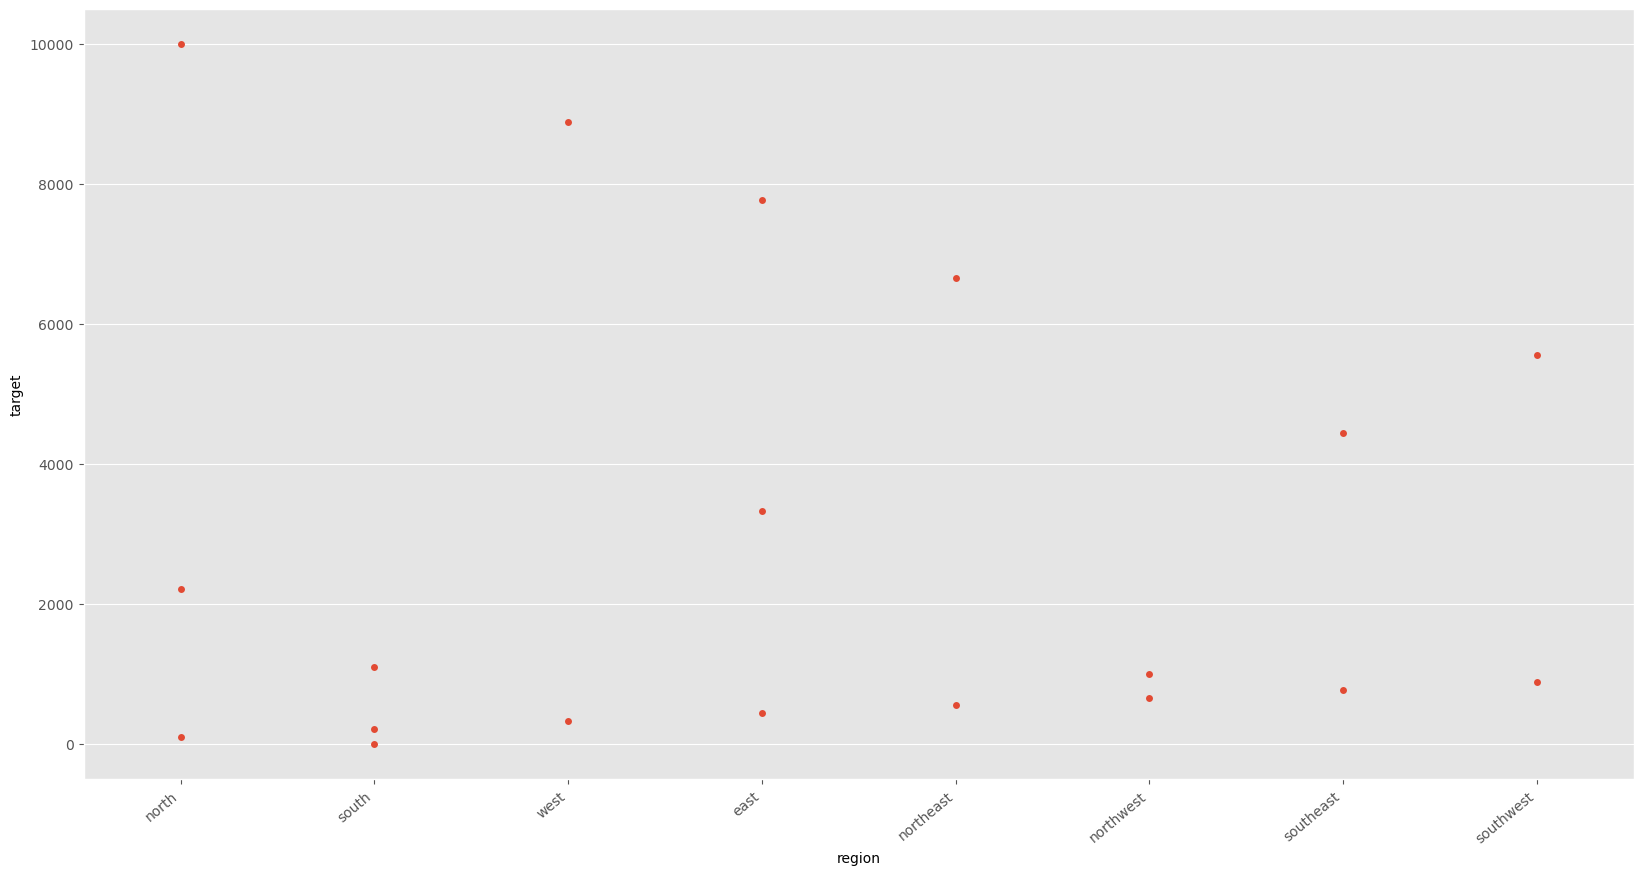

In [12]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='region',y='target',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_15904\1944048075.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


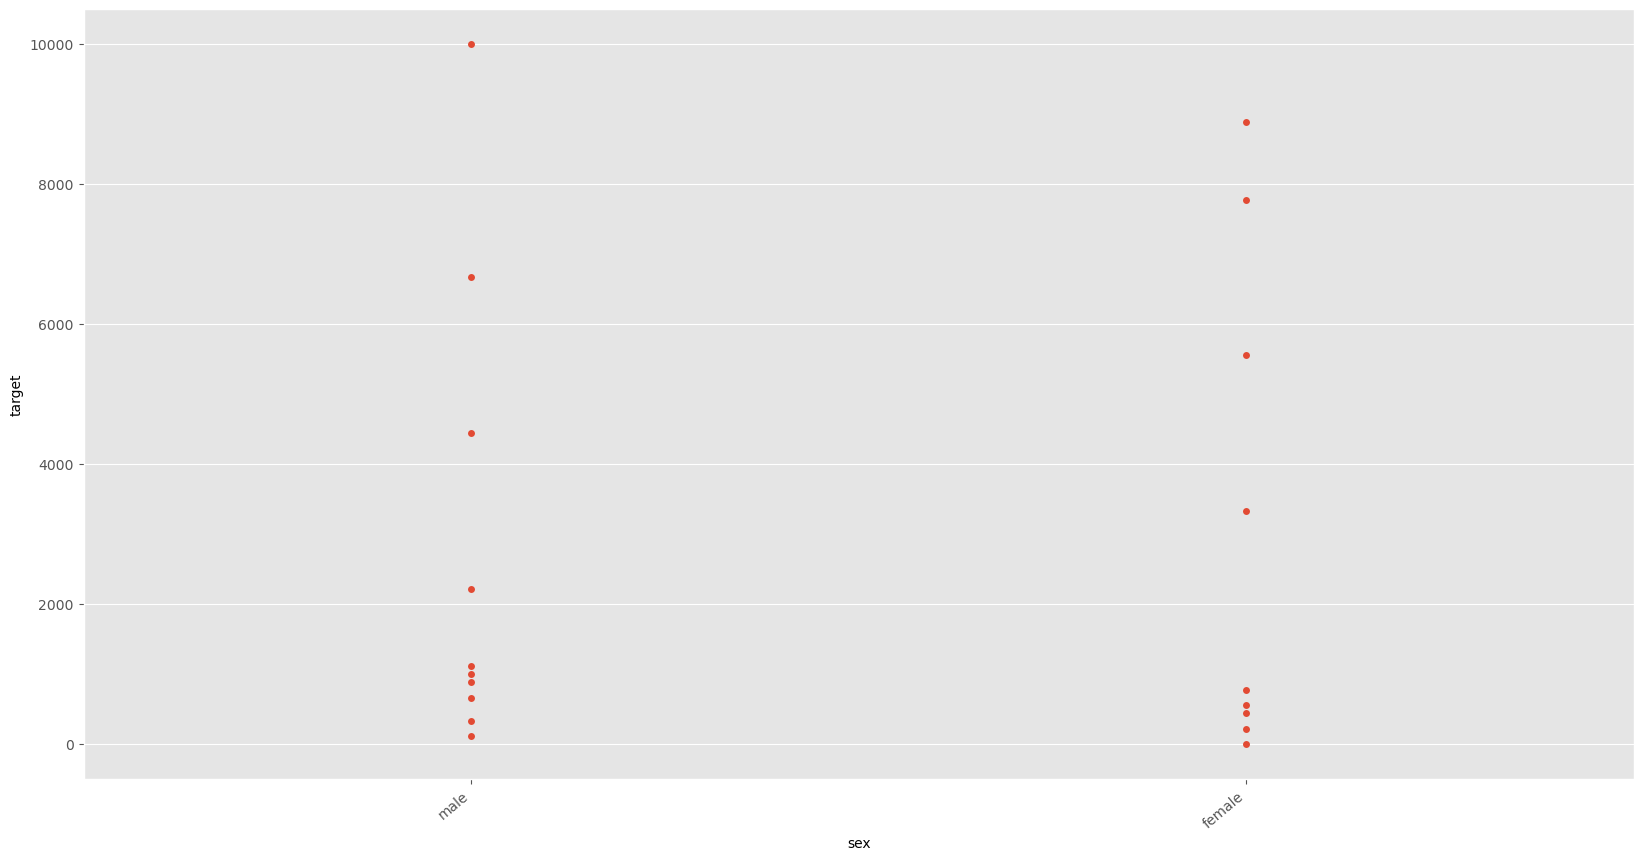

In [13]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='sex',y='target',data=data)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

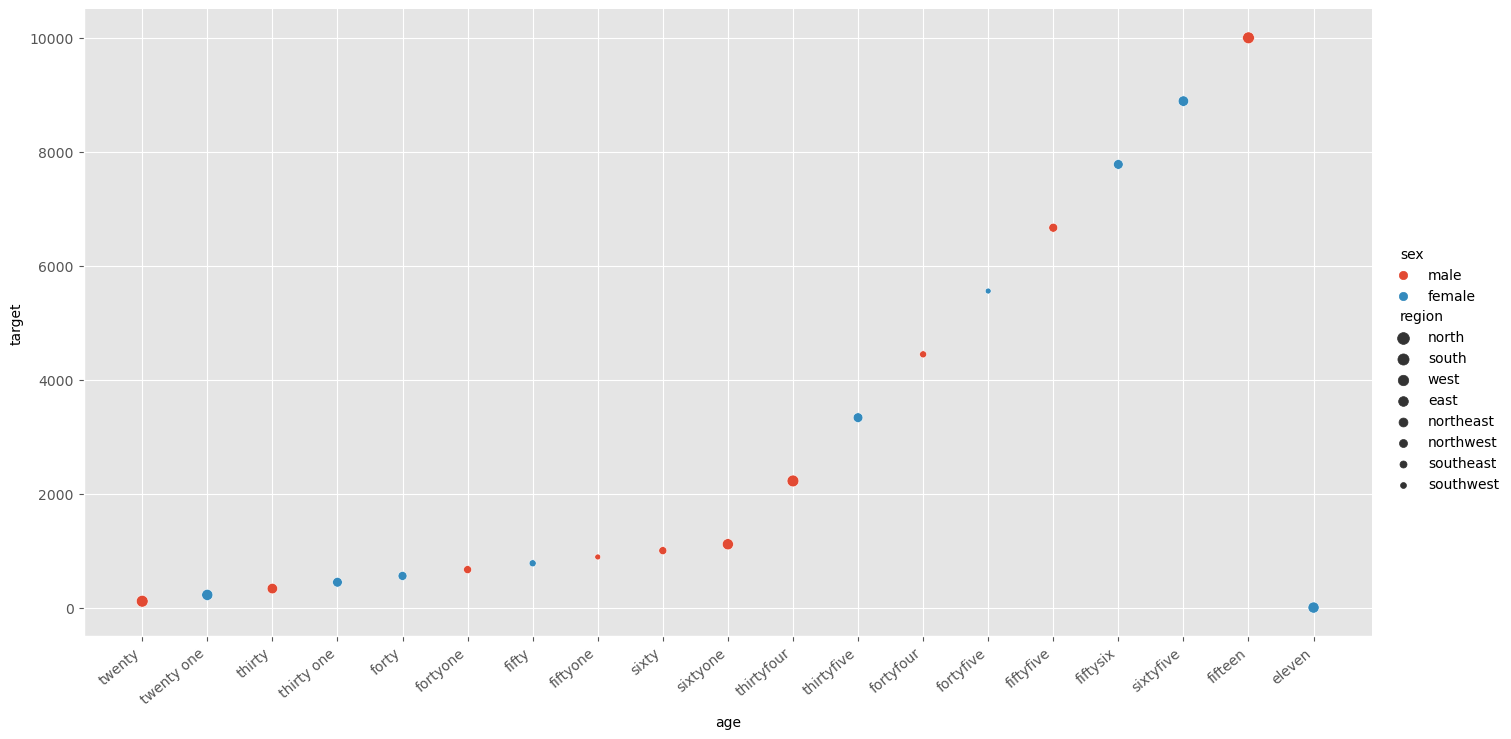

In [14]:
ax=sns.relplot(x='age',y='target',data=data,hue='sex',size='region',height=7,aspect=2)
ax.set_xticklabels(rotation=40,ha='right')

In [15]:
X=data[['region','sex','age','size']]
y=data['target']

In [16]:
X

,region,sex,age,size
0,north,male,twenty,thirtyeight
1,south,female,twenty one,thirtysix
2,west,male,thirty,forty
3,east,female,thirty one,thirtyone
4,northeast,female,forty,fortysix
5,northwest,male,fortyone,thirtynine
6,southeast,female,fifty,thirty
7,southwest,male,fiftyone,twentyeight
8,northwest,male,sixty,fortyfour
9,south,male,sixtyone,thirtythree


APPLYING TRAIN TEST SPLIT

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

In [20]:
ohe=OneHotEncoder()
ohe.fit(X[['region','sex','age','size']])

OneHotEncoder()

In [21]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['region','sex','age','size']),
                                    remainder='passthrough')

In [22]:
lr=LinearRegression()

In [23]:
pipe=make_pipeline(column_trans,lr)

In [24]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['east', 'north', 'northeast', 'northwest', 'south', 'southeast',
       'southwest', 'west'], dtype=object),
                                                                            array(['female', 'male'], dtype=object),
                                                                            array([' twenty one', 'eleven', 'fifteen', 'fifty', 'fiftyfive',
       'fiftyone', 'fiftys...
       'thirty one', 'thirtyfive', 'thirtyfour', 'twenty'], dtype=object),
                                                                            array(['eleven', 'forty', 'fortyfive', 'fortyfour', 'fortynine',
       'fortyone', 'fortysix', 'nine', 'ten', 'thirty', 'thirtyeight',
       'thirtyfive', 'thirtynine', 'thirtyone', 'thirtysix',
       'thirtythree', 'twentyeight', 'twentytwo'], dtype=object)]),
                                                  ['region', 'sex', 'age',
                                                   'size'])])),
                ('linearregression', LinearRegression())])

In [25]:
y_pred=pipe.predict(X_test)

In [26]:
r2_score(y_test,y_pred)

-8.951455144932114

In [27]:
scores=[]
for i in range(1000):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=i)
    lr=LinearRegression()
    pipe=make_pipeline(column_trans,lr)
    pipe.fit(X_train,y_train)
    y_pred=pipe.predict(X_test)
    scores.append(r2_score(y_test,y_pred))

In [28]:
np.argmax(scores)

972

In [29]:
scores[np.argmax(scores)]

0.9454023979355215

In [30]:
pipe.predict(pd.DataFrame(columns=X_test.columns,data=np.array(['north','male','twenty','thirtyeight']).reshape(1,4)))

array([111.00138545])

the best model is found at certain random state

In [31]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=np.argmax(scores))
lr=LinearRegression()
pipe=make_pipeline(column_trans,lr)
pipe.fit(X_train,y_train)
y_pred=pipe.predict(X_test)
r2_score(y_test,y_pred)

0.9454023979355215

In [32]:
import pickle

In [33]:
pickle.dump(pipe,open('trained_model.sav','wb'))

In [34]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [35]:
pipe.predict(pd.DataFrame(columns=['region','sex','age','size'],data=np.array(['north','male','twenty','thirtyeight']).reshape(1,4)))

array([111.])

In [36]:
pipe.steps[0][1].transformers[0][1].categories[0]

array(['east', 'north', 'northeast', 'northwest', 'south', 'southeast',
       'southwest', 'west'], dtype=object)

In [37]:
y_pred

array([3679.43146552,  989.47974138])